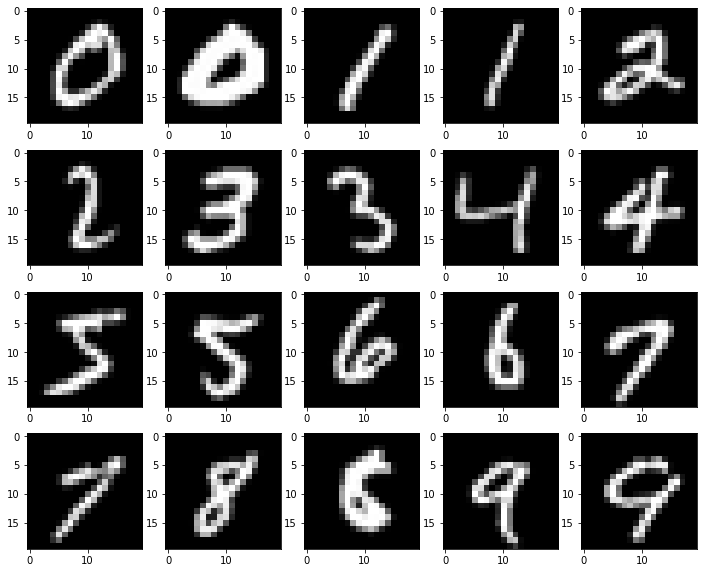

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import os

def read_digits(directory):
    files = sorted(os.listdir(directory))
    digit_images = []
    labels = []
    for file in files:
        img = plt.imread(directory+'/'+file)
        digit_images.append(img)
        label = int(file.split('.')[0].split('_')[1])
        labels.append(label)
    
    return digit_images, labels

digits_per_class = 250
train_imgs, train_labels = read_digits('digits/train')
test_imgs, test_labels = read_digits('digits/test')
    
# Mostra 2 dígitos de cada classe
k = 0
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_imgs[k], 'gray')
    k += digits_per_class//2

In [23]:
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val

In [29]:
def lbp_atributes(imgs):
    lbp_data = []

    height = 20
    width = 20
    img_lbp = np.zeros((height, width), np.uint8)

    for img in imgs:
        for i in range(0, height):
            for j in range(0, width):
                img_lbp[i, j] = lbp_calculated_pixel(img, i, j)
        lbp_data.append(img_lbp)

    return np.array(lbp_data)

train_data = lbp_atributes(train_imgs)

train_data.shape
train_data = np.reshape(train_data, (2500, 400))


In [30]:
print(train_data[0])

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 227 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 227 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 227 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 227 255 255 255 255 255 255 255 255 255 120
 120 120 112 240 240 224 255 255 255 227 255 255 255 255 255 255 255  56
 120  72   0 128 136   8   0 224 225 255 255 227 255 255 255 255 255 255
  60  56   0 198 135 135 143  31  11   1 193 255 255 227 255 255 255 255
 255 255  60  44  66 199 255 255 255 127 110  67 195 255 255 227 255 255
 255 255 255 255  28   0 243 243 255 120 120 104   0 195 255 255 255 227
 255 255 255 255 255 255  14   2 129 128 184 120  64 196 195 255 255 255
 255 227 255 255 255 255 255 255 255  15  15  31  25   4 194 195 255 255
 255 255 255 227 255 255 255 255 255 255 255 255 255 127  46  66 195 255
 255 255 255 255 255 227 255 255 255 255 255 255 25

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# "Treina" o classificador. 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_labels)

KNeighborsClassifier(n_neighbors=3)

In [32]:
test_data = lbp_atributes(test_imgs)
test_data = np.reshape(test_data, (2500,400))

# Classifica as imagens utilizando os 3 vizinhos mais próximos. result é
# um array indicando o índice da classe de cada imagem de teste, neighbors
# é uma matriz na qual cada linha i indica a classe dos k pontos mais próximos
# ao ponto i e dist é uma matriz na qual cada linha i indica a distância entre
# o ponto i e os k vizinhos mais próximos
result = knn.predict(test_data)

print(result)
# Calcula porcentagem de acerto, dada pelo número de valores que são iguais em result
# e responses dividido pelo número de imagens de teste. Aqui podemos utilizar a variável
# labels criada anteriormente porque o conjunto de testes possui o mesmo número de imagens
# que o conjunto de treinamento.
mask = result==test_labels
num_equal = np.sum(mask)
print("Accurácia: {}%".format(100*num_equal/len(result)))

[0 0 0 ... 0 0 0]
Accurácia: 10.0%
